# Load Packages

In [1]:
push!(LOAD_PATH, pwd()) # put current directory on path
using Revise
using UnPack
#include("ModelHelperFuns.jl")  # load the file
#using .ModelHelperFuns         # bring the module into scope
using CooperativeHuntingPkg
using Plots
default(
    guidefontsize=14,   # controls xlabel, ylabel, title font size
    tickfontsize=12,    # controls axis number labels
    legendfontsize=14,  # controls legend font
    linewidth=2,        # controls default line thickness
    grid = false,        # turns off grid in background
    fontfamily="Computer Modern" # font family that matches latex
)
using BifurcationKit, DifferentialEquations
# pgfplotsx()  # Set PGFPlotsX as the backend # this seems to not work on my computer, or on vscode.
using Measures # helps for adjusting location of axis labels
bif_fig_path = "/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/"
using LaTeXStrings

# Basic Parameters

In [2]:
params_base = Dict(
    :α1_of_1 => 0.05,
    :α2_of_1 => 0.95,
    :s1 => 2.0,
    :s2 => 2.0,
    :H1a => 0.0,
    :H2a => 0.0,
    :H2b => 0.0,
    :A1 => 0.6,
    :A2 => 0.5,
    :η2 => 0.6,
    :β2 => 1.0,
    :α2_fun_type => "constant",
    :x_max => 5,
    :Tg => .01,
    :d => 100.0,
    :scale => 5.0
)
u0 = [0.1,0.1, fill(0.1,params_base[:x_max])...]


7-element Vector{Float64}:
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1

# Generate all Figures

below is a summary of the conclusions from all the work done in the rest of the notebook. 

In [3]:
function make_and_save_nice_plots(br_list, fn_string_base)
    pltP = plot_nice_bif(br_list, :P, :scale)
    plot!(ylims=[-0.1,2.8])
    savefig(pltP, bif_fig_path*"p_"*fn_string_base*".pdf")

    pltN1 = plot_nice_bif(br_list, :N1, :scale)
    savefig(pltN1, bif_fig_path*"N1_"*fn_string_base*".pdf")

    pltN2 = plot_nice_bif(br_list, :N2, :scale)
    savefig(pltN2, bif_fig_path*"N2_"*fn_string_base*".pdf")
    pltxbar = plot_nice_bif(br_list, :mean_x, :scale)
    plot!(ylims=[0.9,4.6])
    savefig(pltxbar, bif_fig_path*"meanx_"*fn_string_base*".pdf")

    pltNsum = plot_nice_bif(br_list, :Nsum, :scale)
    savefig(pltNsum, bif_fig_path*"Nsum_"*fn_string_base*".pdf")

end

make_and_save_nice_plots (generic function with 1 method)

Dict{Symbol, Any}(:A1 => 0.6, :H2b => 1.0, :scale => 5.0, :s1 => 2.0, :H1a => 0.0, :H2a => 0.0, :x_max => 5, :α2_of_1 => 0.95, :η2 => 0.6, :α2_fun_type => "constant", :s2 => 2.0, :α1_of_1 => 0.05, :Tg => 0.01, :d => 100.0, :A2 => 0.5, :β2 => 1.0)


┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 47
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 47.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67


"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyratio_type2.pdf"

In [ ]:
plt_ntx

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyratio_type1.pdf"

In [19]:
# type I, Scaled

    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = params[:H2b] = 0
    p_nt = NamedTuple(scale_parameters(params))
    br_list, extra_branches = diagram_2_recursion(
        p_nt; p_min = 1.01, p_max = 8.0, paramkey = :scale, 
        lens = (@optic _.scale), 
        systemfunction = fullsystem_scaled
        );
    plt_nt = make_and_save_nice_plots(br_list, "varyratio_type1")
    
# type II, vary scale
    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = 0.0
    params[:H2b] = 1.0
    println(params)
    x_max = params[:x_max]
    u0 = fill(0.1, x_max+2)
    p_nt = NamedTuple(scale_parameters(params))
    br_list, extra_branches = diagram_2_recursion(
        p_nt; paramkey = :scale, p_min = 1.01, p_max = 8.0, lens = (@optic _.scale), 
        systemfunction = fullsystem_scaled); # this should give some warnings because some of the branches don't converge in the extrabranches
    plt_nt2 = make_and_save_nice_plots([br_list..., extra_branches[1:2]...], "varyratio_type2")

    # type II, vary η2
    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = 0.0
    params[:H2b] = 1.0
    params[:scale] = 4.0
    η2_upper = 6.0/7.0
    p_nt = NamedTuple(scale_parameters(params))
    vary_η2_params = (paramkey = :scale, lens = (@optic _.η2), p_min = 0.01, 
p_max = η2_upper);
    # extra branches found to be unnecessary (see work below)
    br_list = do_base_continuations(p_nt, p_nt.x_max; 
            lens = (@optic _.η2), p_min = 0.01, 
            p_max = η2_upper)

    plt_nt_η2 = make_and_save_nice_plots(br_list, "varyeta2_type2")

# type II, vary A1
    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = 0.0
    params[:H2b] = 1.0
    params[:scale] = 6.0
    params[:A1]=0.6
    p_nt = NamedTuple(scale_parameters(params))
    br_list = do_base_continuations(p_nt, 5; lens = (@optic _.A1), 
        p_min = 0.5, p_max = 1.5)
    plt_nt_A1 = make_and_save_nice_plots(br_list, "varyA1_type2")

┌ Warning: continue_sp failed for N1_extinct specialpoint 3: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:648
┌ Warning: continue_sp failed for N1_extinct specialpoint 4: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:648


Dict{Symbol, Any}(:A1 => 0.6, :H2b => 1.0, :scale => 5.0, :s1 => 2.0, :H1a => 0.0, :H2a => 0.0, :x_max => 5, :α2_of_1 => 0.95, :η2 => 0.6, :α2_fun_type => "constant", :s2 => 2.0, :α1_of_1 => 0.05, :Tg => 0.01, :d => 100.0, :A2 => 0.5, :β2 => 1.0)


┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 47
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 47.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67


"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyA1_type2.pdf"

In [21]:


# type II, vary Tg
    params = deepcopy(params_base)
    params[:H1a] = params[:H2a] = 0.0
    params[:H2b] = 1.0
    params[:scale] = 6.0
    params[:A1]=0.6
    params[:Tg] = 0.1
    params[:Tg_exp] = -3.0
    p_nt = NamedTuple(scale_parameters(params))
    
    br_list = do_base_continuations(p_nt, 5; lens = (@optic _.Tg_exp), 
        p_min = -4.0, p_max = 0.0, systemfunction = fullsystem_scaled_logTg)
        
    plt_meanx = plot_nice_bif_Tg(br_list, :mean_x)
    #plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")

    pltN1 = plot_nice_bif_Tg(br_list, :N1)
    #plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


    pltN2 = plot_nice_bif_Tg(br_list, :N2)
    #plot!(xscale = :log)

    pltNsum = plot_nice_bif_Tg(br_list, :Nsum)
    #plot!(xscale = :log)
    #plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


    pltP = plot_nice_bif_Tg(br_list, :P)
    #plot!(xscale = :log)
    #plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")

    savefig(plt_meanx, bif_fig_path*"meanx_varyTg_type2.pdf")
    savefig(pltN1, bif_fig_path*"N1_varyTg_type2.pdf")
    savefig(pltN2, bif_fig_path*"N2_varyTg_type2.pdf")
    savefig(pltNsum, bif_fig_path*"Nsum_varyTg_type2.pdf")
    savefig(pltP, bif_fig_path*"p_varyTg_type2.pdf")


    
    

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/p_varyTg_type2.pdf"

# Type I Fun Response, Scaled

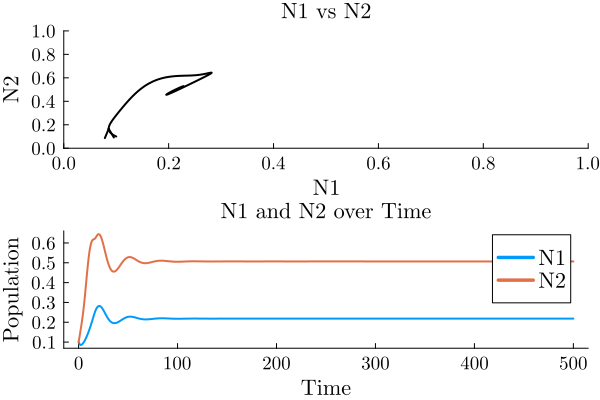

In [5]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = params[:H2b] = 0

p_nt = NamedTuple(scale_parameters(params))
sol, plotN1N2 = simulate_and_plot(u0, p_nt; tf = 500)
display(plotN1N2)

In [6]:
br_list, extra_branches = diagram_2_recursion(p_nt; paramkey = :scale, 
        lens = (@optic _.scale), 
        p_min = 0.1, p_max = 8.0, 
        systemfunction =fullsystem_scaled, 
        dsmax = 0.01)

┌ Warning: continue_sp failed for N1_extinct specialpoint 3: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:648
┌ Warning: continue_sp failed for N1_extinct specialpoint 4: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:648


((coexist =  ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 615
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 0.8683148017292457, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +0.86671513,                                                                     step =  -1
- #  2,       bp at scale ≈ +1.46221503 ∈ (+1.46221503, +1.46221536), |δp|=3e-07, [converged], δ = (-1,  0), step = 147
- #  3,       bp at scale ≈ +1.55694099 ∈ (+1.55694099, +1.55694258), |δp|=2e-06, [converged], δ = (-1,  0), step = 155
- #  4, endpoint at scale ≈ +8.00000000,                                                                     step = 614
, predator_extinct =  ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 562
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 0.1, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +0.10000000,                                                                     step = 

hi

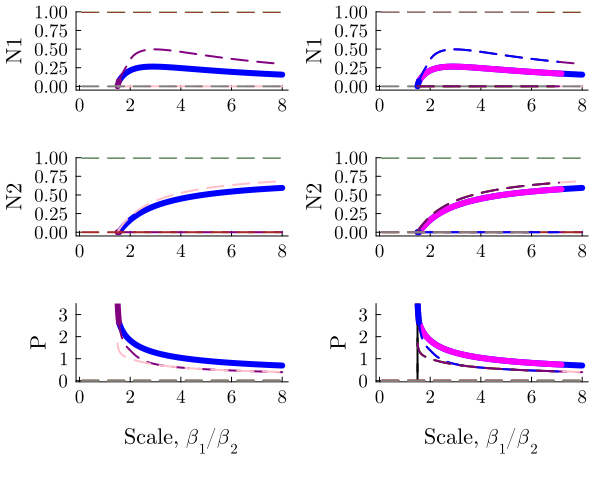

In [7]:
plot_comparison_branches_filtered(
    br_list, [br_list...,extra_branches...], 
    :scale; ymax = 3.5)

In [8]:
plot_comparison_branches_filtered(
    [br_list...,extra_branches...], [br_list...,extra_branches[1]...]
    :scale; ymax = 3.5)

MethodError: MethodError: no method matching iterate(::ContResult{BifurcationKit.EquilibriumCont, @NamedTuple{N1::Float64, N2::Float64, g1::Float64, g2::Float64, g3::Float64, g4::Float64, g5::Float64, P::Float64, mean_x::Float64, param::Float64, itnewton::Int64, itlinear::Int64, ds::Float64, n_unstable::Int64, n_imag::Int64, stable::Bool, step::Int64}, Vector{ComplexF64}, Matrix{ComplexF64}, SpecialPoint{Float64, @NamedTuple{N1::Float64, N2::Float64, g1::Float64, g2::Float64, g3::Float64, g4::Float64, g5::Float64, P::Float64, mean_x::Float64}, Vector{Float64}, Vector{Float64}}, Vector{@NamedTuple{x::Vector{Float64}, p::Float64, step::Int64}}, ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}, BifurcationProblem{BifFunction{typeof(fullsystem_scaled), BifurcationKit.var"#115#117"{typeof(fullsystem_scaled)}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Float64, Nothing}, Vector{Float64}, @NamedTuple{A1::Float64, η1::Float64, H2b::Int64, scale::Float64, s1::Float64, H1a::Int64, H2a::Int64, x_max::Int64, α2_of_1::Float64, η2::Float64, α2_fun_type::String, s2::Float64, α1_of_1::Float64, Tg::Float64, d::Float64, β1::Float64, H1b::Float64, A2::Float64, β2::Float64}, PropertyLens{:scale}, typeof(BifurcationKit.plot_default), typeof(recordFromSolution), typeof(BifurcationKit.save_solution_default), typeof(BifurcationKit.update_default)}, PALC{Secant, MatrixBLS{DefaultLS}, Float64, BifurcationKit.DotTheta{BifurcationKit.var"#330#332", BifurcationKit.var"#331#333"}}})
The function `iterate` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  iterate(!Matched::LazyString)
   @ Base strings/lazy.jl:94
  iterate(!Matched::LazyString, !Matched::Integer)
   @ Base strings/lazy.jl:95
  iterate(!Matched::Base.EnvDict)
   @ Base env.jl:216
  ...


So extra branches unnecessary

## Nice Plots

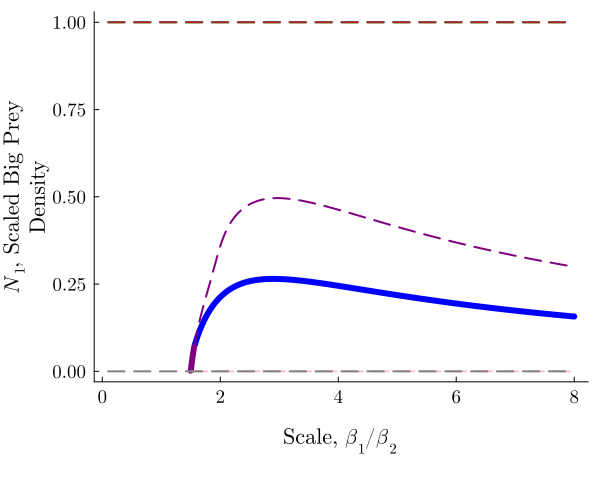

In [119]:
pltN1 = plot_nice_bif(br_list, :N1, :scale)


In [ ]:
pltP = plot_nice_bif(br_list, :P, :scale)
savefig(pltP, bif_fig_path*"p_varyratio_type1.pdf")
pltN1 = plot_nice_bif(br_list, :N1, :scale)
savefig(pltN1, bif_fig_path*"N1_varyratio_type1.pdf")
pltN2 = plot_nice_bif(br_list, :N2, :scale)
savefig(pltN2, bif_fig_path*"N2_varyratio_type1.pdf")
pltxbar = plot_nice_bif(br_list, :mean_x, :scale)
plot!(pltxbar, legend=:right)
savefig(pltxbar, bif_fig_path*"meanx_varyratio_type1.pdf")
pltNsum = plot_nice_bif(br_list, :Nsum, :scale)
savefig(pltNsum, bif_fig_path*"Nsum_varyratio_type1.pdf")

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyratio_type1.pdf"

number of branches in the diagram

In [65]:
diagram.γ.branch
get_branch(diagram, ()).γ
propertynames(diagram)
propertynames(br)
br.specialpoint[3]

342-element StructArray(::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Int64}, ::Vector{Int64}, ::Vector{Float64}, ::Vector{Int64}, ::Vector{Int64}, ::Vector{Bool}, ::Vector{Int64}) with eltype @NamedTuple{N1::Float64, N2::Float64, g1::Float64, g2::Float64, g3::Float64, g4::Float64, g5::Float64, param::Float64, itnewton::Int64, itlinear::Int64, ds::Float64, n_unstable::Int64, n_imag::Int64, stable::Bool, step::Int64}:
 (N1 = 0.21836035146364252, N2 = 0.5068001155062819, g1 = 0.4196360093359236, g2 = 0.12855480306678424, g3 = 0.0745839172498431, g4 = 0.00021421471805437272, g5 = 3.8341093340993844e-7, param = 5.0, itnewton = 0, itlinear = 0, ds = -0.001, n_unstable = 0, n_imag = 0, stable = 1, step = 0)
 (N1 = 0.21839691119655788, N2 = 0.5067349182227856, g1 = 0.41966949489775834, g2 = 0.12857969666225072, g3 = 0.07460779491790831, g4 = 0.00021431222477407306, g5 = 3.8354221

# Type II, Vary Scale

Dict{Symbol, Any}(:A1 => 0.6, :H2b => 1.0, :scale => 5.0, :s1 => 2.0, :H1a => 0.0, :H2a => 0.0, :x_max => 5, :α2_of_1 => 0.95, :η2 => 0.6, :α2_fun_type => "constant", :s2 => 2.0, :α1_of_1 => 0.05, :Tg => 0.01, :d => 100.0, :A2 => 0.5, :β2 => 1.0)


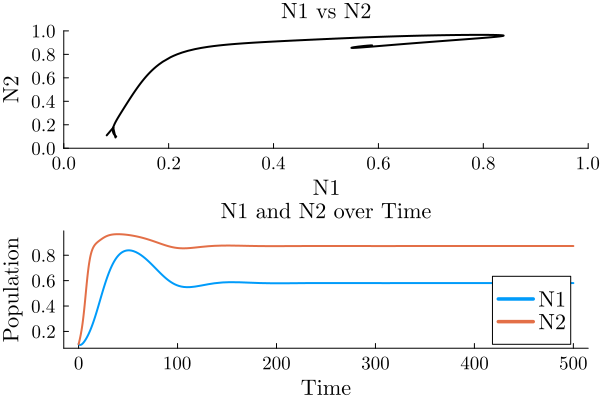

In [12]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
println(params)
x_max = params[:x_max]
u0 = fill(0.1, x_max+2)
p_nt = NamedTuple(scale_parameters(params))
sol, plotN1N2 = simulate_and_plot(u0, p_nt; tf = 500)
display(plotN1N2)

┌ Error: Failure to converge with given tolerance = 1.0e-12.
│ Step = 47
│ You can decrease the tolerance or pass a different norm using the argument `normC`.
│ We reached the smallest value [dsmin] valid for ds, namely 0.0001.
│ Stopping continuation at continuation step 47.
└ @ BifurcationKit /Users/taliaborofsky/.julia/packages/BifurcationKit/nhoqA/src/continuation/Contbase.jl:67


hi

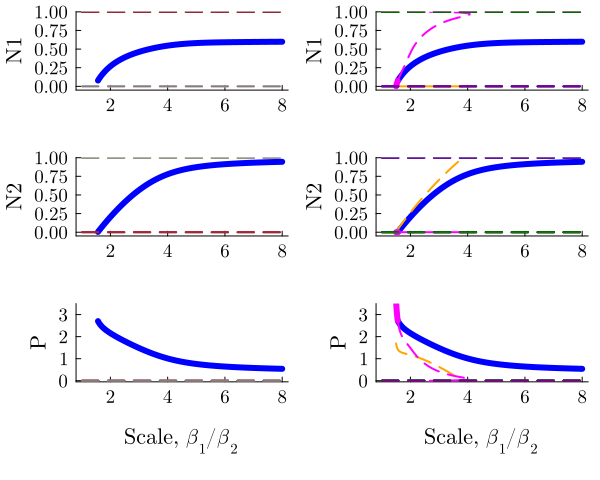

In [13]:
br_list, extra_branches = diagram_2_recursion(
    p_nt, paramkey = :scale; p_min = 1.01, p_max = 8.0, 
    lens = (@optic _.scale), systemfunction = fullsystem_scaled);
#plot_comparison_branches(br_list, extra_branches; ymax = 3.5)
plot_comparison_branches_filtered(br_list, [br_list...,extra_branches...], :scale; ymax = 3.5)

hi

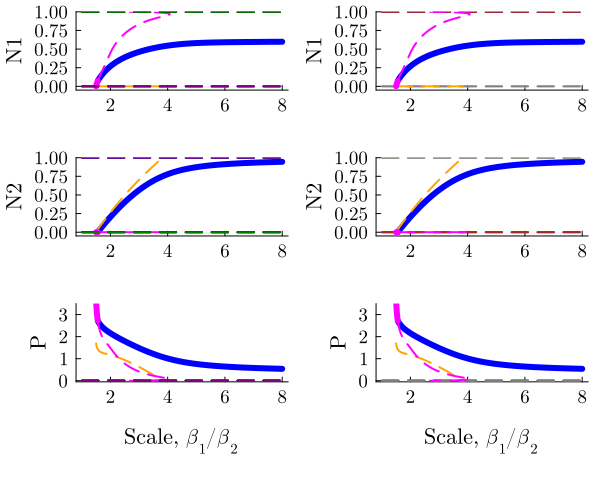

In [17]:
plot_comparison_branches_filtered(
    [br_list...,extra_branches...], [br_list...,extra_branches[1:2]...], 
    :scale; ymax = 3.5)

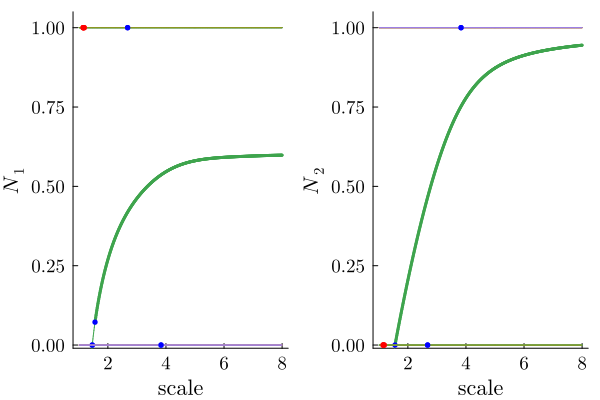

2-element Vector{Any}:
 Plot{Plots.GRBackend() n=13}
 Plot{Plots.GRBackend() n=13}

In [123]:
plot_branches(br_list)

### A few simulations

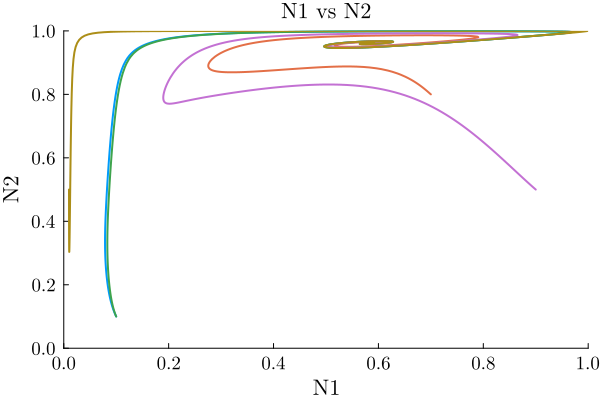

In [124]:
tf = 1000
tspan = (0.0, tf)
params[:scale ]= 11
p_nt = NamedTuple(scale_parameters(params))

starting_points = [ fill(0.1, x_max + 2),
                    [0.7, 0.8, fill(0.1,x_max)...],
                    [0.1, 0.1, fill(0.2,x_max-2)..., 0.01, 0.01],
                    [0.9, 0.5, 0.01, 1.0, 0.01, 0.01, 0.01],
                    [0.01, 0.5, 0.01, 1.0, 0.01, 0.01, 0.01]]
plt = plot()
for u0 in starting_points
    prob = ODEProblem(fullsystem_scaled!, u0, tspan, p_nt)
    sol = solve(prob)

    # Extract N1 and N2 from the solution
    N1 = sol[1, :]  # First component of the solution
    N2 = sol[2, :]  # Second component of the solution
    plot!(N1, N2, xlabel="N1", ylabel="N2", title="N1 vs N2", legend=false, 
            xlims = (0,1), ylims = (0,1))
end
display(plt)

## Check Bifurcation Points

In [128]:
continue_sp_params = [p_nt, :scale, 
        fullsystem_scaled, (@optic _.scale), 1.01, 8.0, 0.01]

7-element Vector{Any}:
  (A1 = 0.6, η1 = 0.05454545454545454, H2b = 1.0, scale = 11, s1 = 2.0, H1a = 0.0, H2a = 0.0, x_max = 5, α2_of_1 = 0.95, η2 = 0.6, α2_fun_type = "constant", s2 = 2.0, α1_of_1 = 0.05, Tg = 0.01, d = 100.0, β1 = 11.0, H1b = 13.2, A2 = 0.5, β2 = 1.0)
  :scale
  fullsystem_scaled (generic function with 2 methods)
  (@o _.scale)
 1.01
 8.0
 0.01

### Coexistence

In [ ]:
br_co = br_list.coexist
println(br_co)
println(br_co.specialpoint[2].x)
println(br_co.specialpoint[3].x)

sp = br_co.specialpoint[3]; 


br_co_extra = continue_sp(sp,continue_sp_params...
                        )


 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 531
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 1.01, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +1.01000000,                                                                     step =   0
- #  2,       bp at scale ≈ +1.46252346 ∈ (+1.46252346, +1.46252346), |δp|=3e-10, [converged], δ = (-1,  0), step =  60
- #  3,       bp at scale ≈ +1.55742547 ∈ (+1.55742547, +1.55742702), |δp|=2e-06, [converged], δ = (-1,  0), step =  69
- #  4, endpoint at scale ≈ +8.00000000,                                                                     step = 530

[-1.0277426920439636e-10, -0.04995648711111263, 0.5121444567111919, 0.23468487539950467, 0.2165985372037629, 0.18376292211299355, 0.14081169364749738]
[0.0722290581001968, -3.7811116948617485e-9, 0.5505438868628232, 0.27707981338860693, 0.28233207805454724, 0.14165442921293578, 0.04156265073454036]


 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 802
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 1.4494902611309297, ends at 1.3034920991110226
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +1.44944677,                                                                     step =  -1
- #  2,       bp at scale ≈ +1.50000000 ∈ (+1.50000000, +1.50000000), |δp|=2e-09, [converged], δ = (-1,  0), step = 374
- #  3,       bp at scale ≈ +1.55742523 ∈ (+1.55742523, +1.55742547), |δp|=2e-07, [    guess], δ = ( 1,  0), step = 399
- #  4,       bp at scale ≈ +4.07398525 ∈ (+4.07398525, +4.07398525), |δp|=1e-10, [converged], δ = ( 1,  0), step = 594
- #  5,       bp at scale ≈ +2.68021640 ∈ (+2.68021640, +2.68021651), |δp|=1e-07, [converged], δ = (-1,  0), step = 703
- #  6,     hopf at scale ≈ +2.06716740 ∈ (+2.06716740, +2.06717430), |δp|=7e-06, [converged], δ = ( 2,  2), step = 747
- #  7, endpoint at scale ≈ +1.28934997,                                

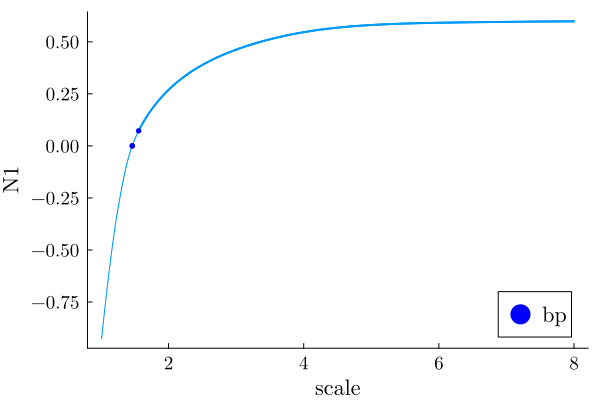

In [129]:
plot(br_co)

### Predator Extinct

In [130]:
br_P_extinct = br_list.predator_extinct
println(br_P_extinct)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 498
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 1.01, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +1.01000000,                                                                     step =   0
- #  2, endpoint at scale ≈ +8.00000000,                                                                     step = 497



### Big Prey extinct

In [133]:
br_N1_extinct = br_list.N1_extinct
println(br_N1_extinct)
println(br_N1_extinct.specialpoint[2].x)


 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 498
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 1.01, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +1.01000000,                                                                     step =   0
- #  2,       bp at scale ≈ +3.83114869 ∈ (+3.83114869, +3.83115042), |δp|=2e-06, [converged], δ = (-1,  0), step = 200
- #  3, endpoint at scale ≈ +8.00000000,                                                                     step = 497

[0.0, 1.0, 3.548962169877112e-18, -1.0982840952336072e-18, 4.9604366973579964e-20, -4.0763460586613204e-21, 6.154223757394526e-22]


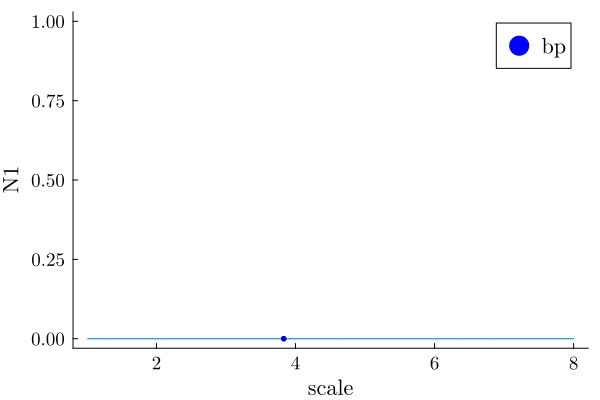

In [134]:
br_N1_extra =continue_sp(br_N1_extinct.specialpoint[2], continue_sp_params...)

# continuation(br_N1_extinct,2;bothside=true)
plot(br_N1_extra)

### Small Prey extinct

In [135]:
br_N2_extinct = br_list.N2_extinct

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 499
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 1.01, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +1.01000000,                                                                     step =   0
- #  2,     hopf at scale ≈ +1.14843254 ∈ (+1.14843254, +1.14846016), |δp|=3e-05, [converged], δ = (-2, -2), step =  10
- #  3,     hopf at scale ≈ +1.18497560 ∈ (+1.18497560, +1.18498941), |δp|=1e-05, [converged], δ = (-2, -2), step =  13
- #  4,       bp at scale ≈ +2.68021642 ∈ (+2.68021642, +2.68021653), |δp|=1e-07, [converged], δ = (-1,  0), step = 119
- #  5, endpoint at scale ≈ +8.00000000,                                                                     step = 498


In [136]:
hopf_pt = br_N2_extinct.specialpoint[2].x
hopf_pt = map(x -> x<1e-10 ? 0.0 : x, hopf_pt)
hopf_pt = map(x -> x>1 ? 1.0 : x, hopf_pt)

7-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

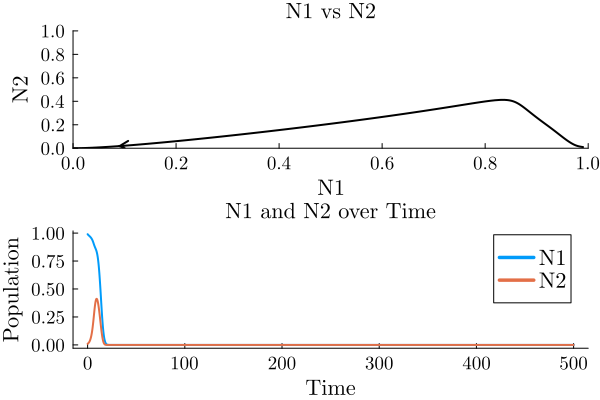

In [137]:
params[:scale] = 1.14
p_nt = NamedTuple(scale_parameters(params))
sol, plotN1N2 = simulate_and_plot([.99, fill(.01,x_max+1)...], p_nt; tf = 500)
display(plotN1N2)

the hopf bifurcation point in the plot is not in a valid range

Checking bifurcation points to see if any of them can be branched from

In [138]:
 br_N2_extinct.specialpoint[3].x


7-element Vector{Float64}:
  1.000000000000184
  0.0
 -1.8920384495792607e-14
 -2.3672904252407188e-14
 -4.805808804589862e-14
  3.107984192775142e-14
 -6.166510465941073e-14

In [139]:
 br_N2_extinct.specialpoint[4].x


7-element Vector{Float64}:
  1.000000000000184
  0.0
 -1.8920384495792607e-14
 -2.3672904252407188e-14
 -4.805808804589862e-14
  3.107984192775142e-14
 -6.166510465941073e-14

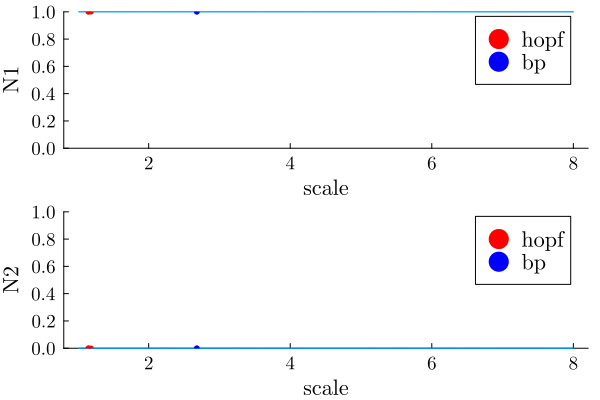

In [140]:
n2_br = continue_sp(br_N2_extinct.specialpoint[4], continue_sp_params...)
# continuation(br_N2_extinct, 4; bothside = true)
plot1 = plot(n2_br,ylims = [0,1])
plot2 = plot(n2_br, vars = (:param, :N2), ylims = [0,1])
plot(plot1, plot2, layout = (2,1))

### Big prey and predator extinct

In [141]:
br_list.N1P_extinct

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 499
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 1.01, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +1.01000000,                                                                     step =   0
- #  2,     hopf at scale ≈ +1.14843254 ∈ (+1.14843254, +1.14846016), |δp|=3e-05, [converged], δ = (-2, -2), step =  10
- #  3,     hopf at scale ≈ +1.18497560 ∈ (+1.18497560, +1.18498941), |δp|=1e-05, [converged], δ = (-2, -2), step =  13
- #  4,       bp at scale ≈ +2.68021642 ∈ (+2.68021642, +2.68021653), |δp|=1e-07, [converged], δ = (-1,  0), step = 119
- #  5, endpoint at scale ≈ +8.00000000,                                                                     step = 498


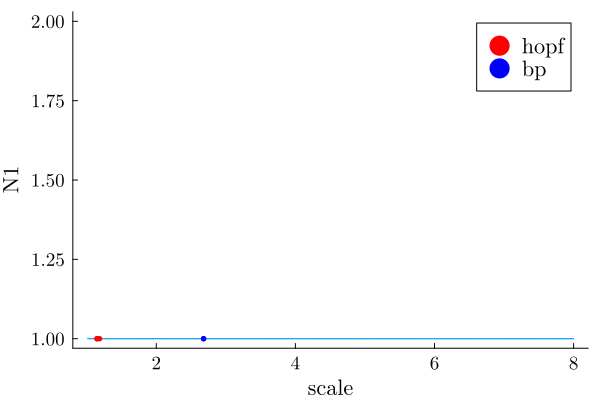

In [ ]:
plot(br_list.N1bP_extinct)

In [142]:
br_po = continuation(br_list.N1P_extinct, 3, ContinuationPar(),
        PeriodicOrbitOCollProblem(20, 5)
        )

MethodError: MethodError: no method matching Float64(::ForwardDiff.Dual{ForwardDiff.Tag{BifurcationKit.var"#546#552"{BifurcationProblem{BifFunction{typeof(fullsystem_scaled), BifurcationKit.var"#115#117"{typeof(fullsystem_scaled)}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Float64, Nothing}, Vector{Float64}, @NamedTuple{A1::Float64, η1::Float64, H2b::Float64, scale::Float64, s1::Float64, H1a::Float64, H2a::Float64, x_max::Int64, α2_of_1::Float64, η2::Float64, α2_fun_type::String, s2::Float64, α1_of_1::Float64, Tg::Float64, d::Float64, β1::Float64, H1b::Float64, A2::Float64, β2::Float64}, PropertyLens{:scale}, typeof(BifurcationKit.plot_default), typeof(recordFromSolution), typeof(BifurcationKit.save_solution_default), typeof(BifurcationKit.update_default)}, @NamedTuple{A1::Float64, η1::Float64, H2b::Float64, scale::Float64, s1::Float64, H1a::Float64, H2a::Float64, x_max::Int64, α2_of_1::Float64, η2::Float64, α2_fun_type::String, s2::Float64, α1_of_1::Float64, Tg::Float64, d::Float64, β1::Float64, H1b::Float64, A2::Float64, β2::Float64}, PropertyLens{:scale}, Vector{Float64}}, Float64}, Float64, 1})
The type `Float64` exists, but no method is defined for this combination of argument types when trying to construct it.

Closest candidates are:
  (::Type{T})(::Real, !Matched::RoundingMode) where T<:AbstractFloat
   @ Base rounding.jl:265
  (::Type{T})(::T) where T<:Number
   @ Core boot.jl:900
  Float64(!Matched::IrrationalConstants.Twoπ)
   @ IrrationalConstants ~/.julia/packages/IrrationalConstants/lWTip/src/macro.jl:131
  ...


I assume I'm getting this problem because of the hopf bifurcation being around 0

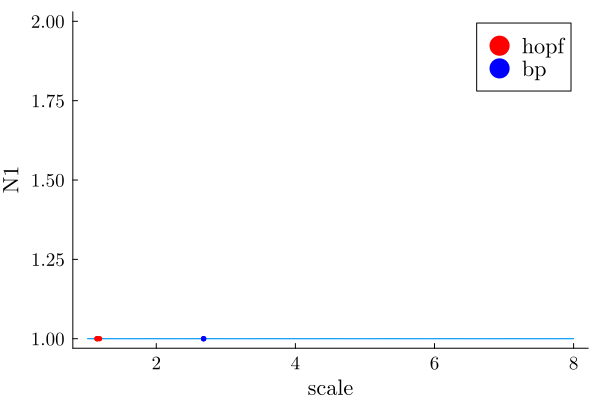

In [143]:
plot(continue_sp(br_list.N1P_extinct.specialpoint[4], continue_sp_params...))
    


 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 498
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter scale starts at 1.01, ends at 8.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at scale ≈ +1.01000000,                                                                     step =   0
- #  2,       bp at scale ≈ +3.83114869 ∈ (+3.83114869, +3.83115042), |δp|=2e-06, [converged], δ = (-1,  0), step = 200
- #  3, endpoint at scale ≈ +8.00000000,                                                                     step = 497



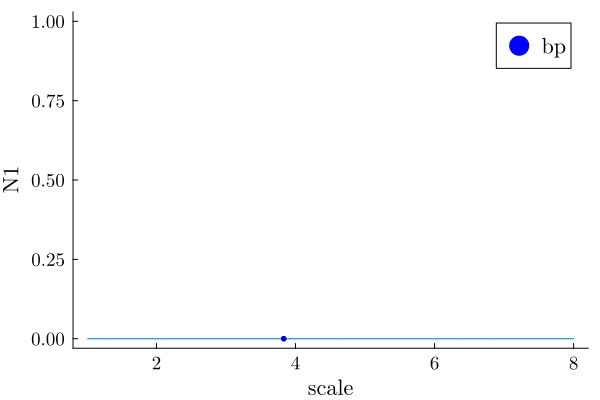

In [144]:
println(br_list.N2P_extinct)
plot(continue_sp(br_list.N2P_extinct.specialpoint[2], continue_sp_params...))

## Nice Plots 

In [76]:
pltN1 = plot_nice_bif(br_list, :N1, :scale)
savefig(pltN1, bif_fig_path*"N1_varyratio_type2.pdf")
pltN2 = plot_nice_bif(br_list, :N2, :scale)
savefig(pltN2, bif_fig_path*"N2_varyratio_type2.pdf")
pltxbar = plot_nice_bif(br_list, :mean_x, :scale)
savefig(pltxbar, bif_fig_path*"meanx_varyratio_type2.pdf")
pltNsum = plot_nice_bif(br_list, :Nsum, :scale)
savefig(pltNsum, bif_fig_path*"Nsum_varyratio_type2.pdf")

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyratio_type2.pdf"

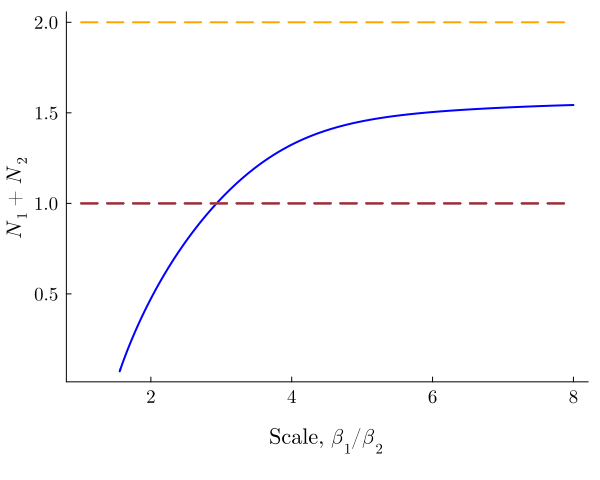

In [81]:
pltNsum = plot_nice_bif(br_list, :Nsum, :scale)


# Type II, vary $\eta_2$

In [145]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
params[:scale] = 4.0
println(params)
η2_upper = 6.0/7.0
x_max = params[:x_max]
u0 = fill(0.1, x_max+2)
p_nt = NamedTuple(scale_parameters(params))
sol, plotN1N2 = simulate_and_plot(u0, p_nt; tf = 500)
#display(plotN1N2)

vary_η2_params = (lens = (@optic _.η2), p_min = 0.01, 
p_max = η2_upper);

Dict{Symbol, Any}(:A1 => 0.6, :H2b => 1.0, :scale => 4.0, :s1 => 2.0, :H1a => 0.0, :H2a => 0.0, :x_max => 5, :α2_of_1 => 0.95, :η2 => 0.6, :α2_fun_type => "constant", :s2 => 2.0, :α1_of_1 => 0.05, :Tg => 0.01, :d => 100.0, :A2 => 0.5, :β2 => 1.0)


┌ Warning: continue_sp failed for coexist specialpoint 4: ErrorException("Newton failed to converge. Required for the computation of the initial tangent.")
└ @ CooperativeHuntingPkg.MyBifTools /Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:648


hi

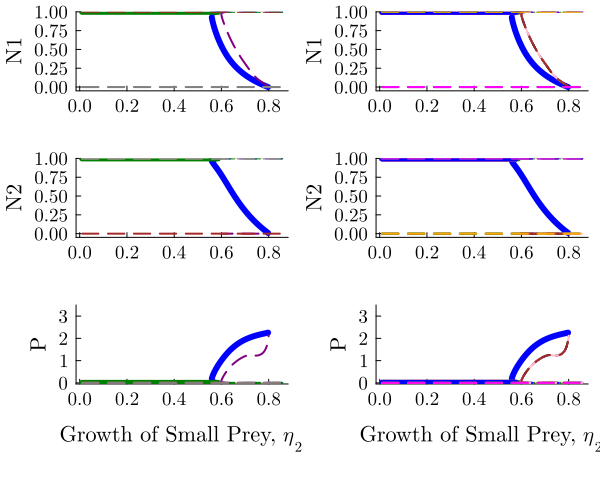

In [146]:
br_list, extra_branches = diagram_2_recursion(
    p_nt, paramkey = :η2; vary_η2_params..., systemfunction = fullsystem_scaled);
#plot_comparison_branches(br_list, extra_branches; ymax = 3.5)
plot_comparison_branches_filtered(
    br_list, [br_list...,extra_branches...], :η2;
     ymax = 3.5, x_max = 5)

## Nice Plots

In [ ]:
plt_meanx = plot_nice_bif(br_list, :mean_x, :η2)
savefig(plt_meanx, bif_fig_path*"meanx_varyeta2_type2.pdf")

pltN1 = plot_nice_bif(br_list, :N1, :η2)
savefig(pltN1, bif_fig_path*"N1_varyeta2_type2.pdf")

pltN2 = plot_nice_bif(br_list, :N2, :η2)
savefig(pltN2, bif_fig_path*"N2_varyeta2_type2.pdf")

pltNsum = plot_nice_bif(br_list, :Nsum, :η2)
savefig(pltNsum, bif_fig_path*"Nsum_varyeta2_type2.pdf")

pltP = plot_nice_bif(br_list, :P, :η2)
savefig(pltP, bif_fig_path*"p_varyeta2_type2.pdf")
#plot_nice_bif(br_list, :g3, :η2)

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/p_varyeta2_type2.pdf"

# Type II, Vary A1

In [ ]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
params[:scale] = 6.0
params[:A1]=0.6
p_nt = NamedTuple(scale_parameters(params))

(A1 = 0.6, α1_of_1 = 0.05, β2 = 1.0, H2b = 1.0, Tg = 0.01, d = 100.0, β1 = 6.0, η1 = 0.09999999999999999, H1b = 7.199999999999999, A2 = 0.5, s1 = 2.0, H1a = 0.0, H2a = 0.0, scale = 6.0, x_max = 5, α2_of_1 = 0.95, η2 = 0.6, α2_fun_type = "constant", s2 = 2.0)

In [59]:
methods(diagram_2_recursion)

# 1 method for generic function "diagram_2_recursion" from CooperativeHuntingPkg.MyBifTools:
 [1] diagram_2_recursion(p_nt; lens, p_min, p_max, systemfunction, dsmax)
     @ ~/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:578

hi

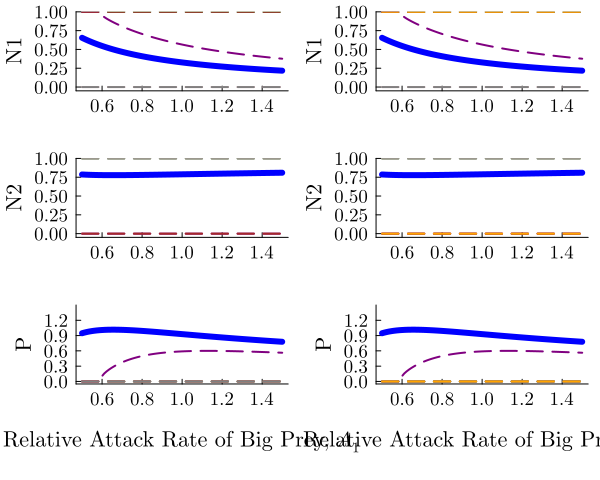

In [151]:
br_list, extra_branches = diagram_2_recursion(
    p_nt, ; lens = (@optic _.A1), paramkey = :A1,
    p_min = 0.5, p_max = 1.5, 
    systemfunction = fullsystem_scaled);
#plot_comparison_branches(br_list, extra_branches; ymax = 3.5)
plot_comparison_branches_filtered(
    br_list, [br_list...,extra_branches...], :A1;
     ymax = 1.5, x_max = 5)

## Nice Plot

In [21]:
plt_meanx = plot_nice_bif(br_list, :mean_x, :A1)
plot!(ylims=[1,4.6])
savefig(plt_meanx, bif_fig_path * "meanx_varyA1_type2.pdf")

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/meanx_varyA1_type2.pdf"

In [22]:
pltN1 = plot_nice_bif(br_list, :N1, :A1)
savefig(pltN1, bif_fig_path * "N1_varyA1_type2.pdf")


"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/N1_varyA1_type2.pdf"

In [23]:
pltN2 = plot_nice_bif(br_list, :N2, :A1)
savefig(pltN2, bif_fig_path * "N2_varyA1_type2.pdf")



"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/N2_varyA1_type2.pdf"

In [24]:
pltNsum = plot_nice_bif(br_list, :Nsum, :A1)
plot!(ylims=[0,2])
savefig(pltNsum, bif_fig_path * "Nsum_varyA1_type2.pdf")



"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/Nsum_varyA1_type2.pdf"

In [ ]:
pltp = plot_nice_bif(br_list, :P, :A1)
plot!(ylims=[0.0, 2.0])
savefig(pltp, bif_fig_path * "p_varyA1_type2.pdf")


"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/BifurcationDiagrams/p_varyA1_type2.pdf"

# Type II, Vary Tg

In [152]:
params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
params[:scale] = 6.0
params[:A1]=0.6
params[:Tg] = 0.1
params[:Tg_exp] = -3.0
p_nt = NamedTuple(scale_parameters(params))

(A1 = 0.6, η1 = 0.09999999999999999, H2b = 1.0, scale = 6.0, s1 = 2.0, H1a = 0.0, H2a = 0.0, x_max = 5, α2_of_1 = 0.95, η2 = 0.6, α2_fun_type = "constant", s2 = 2.0, α1_of_1 = 0.05, Tg = 0.1, Tg_exp = -3.0, d = 100.0, β1 = 6.0, H1b = 7.199999999999999, A2 = 0.5, β2 = 1.0)

In [153]:
br_list, extra_branches = diagram_2_recursion(p_nt; paramkey = :Tg,
        lens = (@optic _.Tg_exp), 
        p_min = -4.0, p_max = 0.0, 
        systemfunction =fullsystem_scaled_logTg 
        )

((coexist =  ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 286
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter Tg_exp starts at -4.0, ends at 0.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at Tg_exp ≈ -4.00000000,                                                                     step =   0
- #  2, endpoint at Tg_exp ≈ +0.00000000,                                                                     step = 285
, predator_extinct =  ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 286
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter Tg_exp starts at -4.0, ends at 0.0
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at Tg_exp ≈ -4.00000000,                                                                     step =   0
- #  2,       bp at Tg_exp ≈ -2.83450836 ∈ (-2.83451008, -2.83450836), |δp|=2e-06, [converged], δ = ( 1,  0), step =  84
- #  3, endpoint at Tg_exp ≈ +0.00000000,                                                                     step = 285
, 

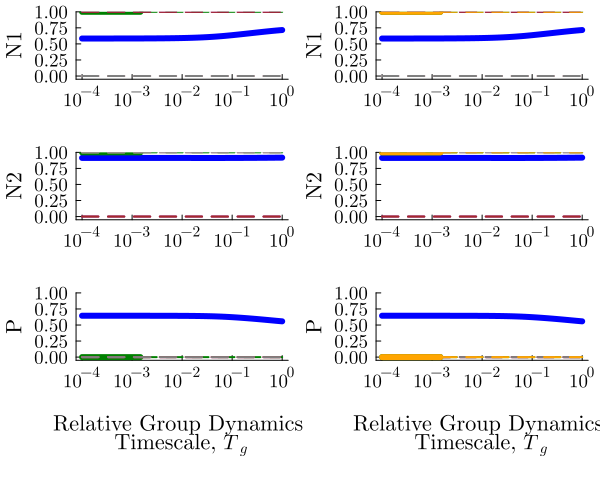

In [154]:
plot_comparison_branches_filtered(br_list, [br_list..., extra_branches...], :Tg; 
    ymax = 1.0, plot_fun = plot_nice_bif_Tg)

0.58411687061663590.58411694554708970.58411676571641260.5841165022073510.5841174303769929

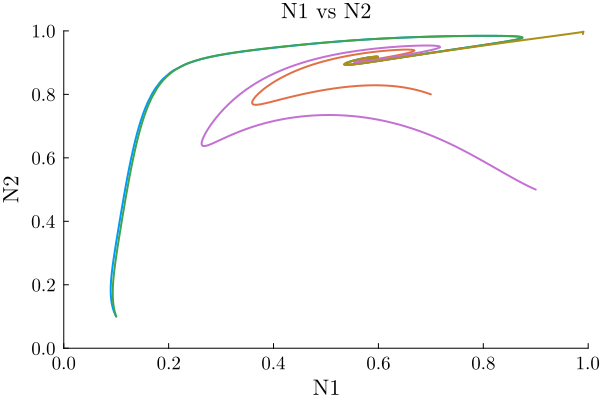

In [96]:
tf = 1000
tspan = (0.0, tf)

params = deepcopy(params_base)
params[:H1a] = params[:H2a] = 0.0
params[:H2b] = 1.0
params[:scale] = 6.0
params[:A1]=0.6
params[:Tg] = 0.0001
p_nt = NamedTuple(scale_parameters(params))
starting_points = [ fill(0.1, x_max + 2),
                    [0.7, 0.8, fill(0.1,x_max)...],
                    [0.1, 0.1, fill(0.2,x_max-2)..., 0.01, 0.01],
                    [0.9, 0.5, 0.01, 1.0, 0.01, 0.01, 0.01],
                    [0.99, 0.99, fill(0.001,x_max)...]]
plt = plot()
for u0 in starting_points
    prob = ODEProblem(fullsystem_scaled!, u0, tspan, p_nt)
    sol = solve(prob)

    # Extract N1 and N2 from the solution
    N1 = sol[1, :]  # First component of the solution
    N2 = sol[2, :]  # Second component of the solution
    print(N1[end])
    plot!(N1, N2, xlabel="N1", ylabel="N2", title="N1 vs N2", legend=false, 
            xlims = (0,1), ylims = (0,1))
end
display(plt)

In [73]:
methods(plot_nice_bif_Tg)

# 1 method for generic function "plot_nice_bif_Tg" from CooperativeHuntingPkg.MyBifTools:
 [1] plot_nice_bif_Tg(br_list, y_axis_symbol; colorblind_palette)
     @ ~/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:186

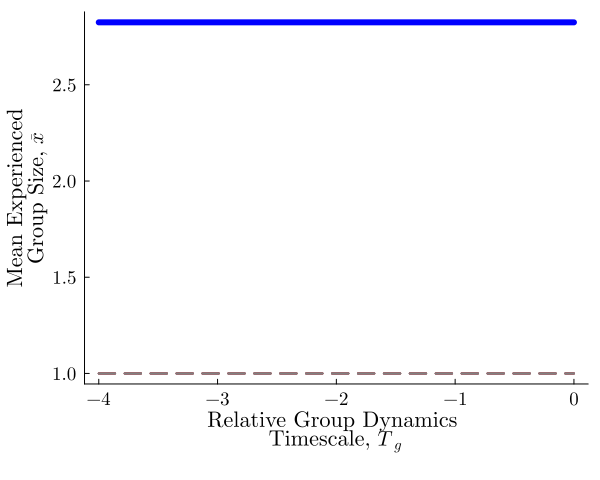

In [21]:
plt_meanx = plot_nice_bif(br_list, :mean_x, :Tg)
#plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")

In [8]:
methods(plot_nice_bif_Tg)

# 1 method for generic function "plot_nice_bif_Tg" from CooperativeHuntingPkg.MyBifTools:
 [1] plot_nice_bif_Tg(br_list, y_axis_symbol; colorblind_palette)
     @ ~/Documents/CH_GroupFormation/CH_code/Julia_version/CooperativeHuntingPkg/src/MyBifTools.jl:304

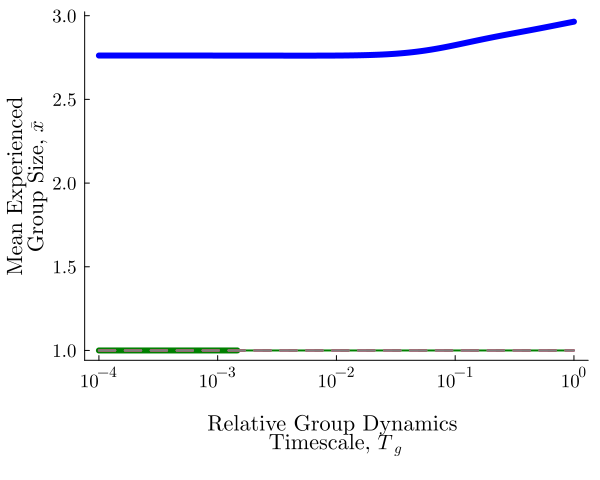

In [9]:
plt_meanx = plot_nice_bif_Tg(br_list, :mean_x)

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborofsky/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/taliaborof

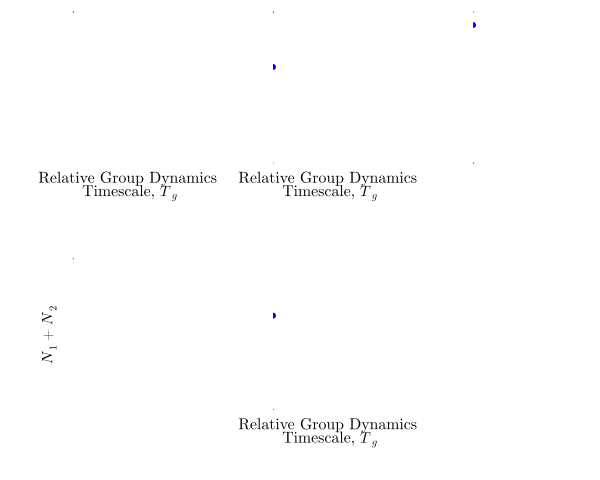

In [ ]:
plt_meanx = plot_nice_bif(br_list, :mean_x, :Tg_exp)
plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")

pltN1 = plot_nice_bif(br_list, :N1, :Tg)
plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


pltN2 = plot_nice_bif(br_list, :N2, :Tg)
plot!(xscale = :log10)

pltNsum = plot_nice_bif(br_list, :Nsum, :Tg)
plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


pltP = plot_nice_bif(br_list, :P, :Tg)
plot!(xscale = :log10)
plot!(xlabel = "Relative Group Dynamics \nTimescale, "*L"T_g")


#plot_nice_bif(br_list, :g3, :η2)
pltfull = plot(plt_meanx, pltN1, pltN2, pltNsum, pltP, layout = (2,3),
tickfontsize=8, guidefontsize = 10)

In [5]:
savefig(plt_meanx, bif_fig_path*"meanx_varyTg_type2.pdf")
savefig(pltN1, bif_fig_path*"N1_varyTg_type2.pdf")
savefig(pltN2, bif_fig_path*"N2_varyTg_type2.pdf")
savefig(pltNsum, bif_fig_path*"Nsum_varyTg_type2.pdf")
savefig(pltP, bif_fig_path*"p_varyTg_type2.pdf")

UndefVarError: UndefVarError: `savefig` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Breaking input down into segments and plotting stability:

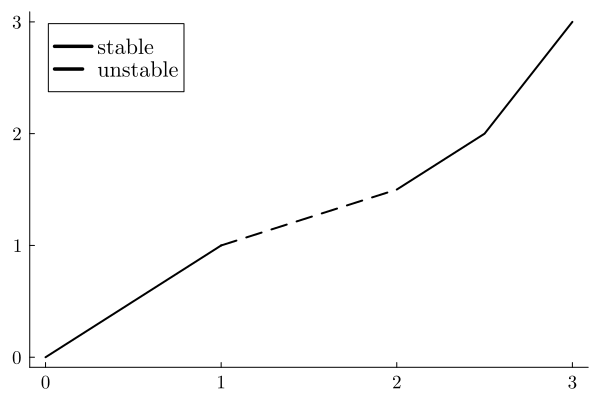

In [ ]:
using Plots


plot()
# Example usage
x_vec = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y_vec = [0.0, 0.5, 1.0, 1.25, 1.5, 2.0, 3.0]
stability_vec = [true, true, false, false, true, true, false]  # Stability of each point

plt = plot_segments(x_vec, y_vec, stability_vec)
display(plt)

In [16]:
1.5*.5

0.75